#Ejercicio \#1 - Calculo de PI
###Sistemas distribuidos
####Juan Sebastián Rodríguez Castellanos

Realizar las pruebas de forma local y subir el archivo times.csv

##Graficar los resultados obtenidos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Leer el archivo csv obtenido de OMP

In [54]:
headers = ['Threads', 'Time(s)', 'Pad']
df = pd.read_csv('times.csv', names=headers)
df

,Threads,Time(s),Pad
0,1,6.059890,False
1,1,6.636868,False
2,2,7.842951,False
3,2,8.367299,False
4,4,8.775969,False
5,4,8.037219,False
6,8,6.568554,False
7,8,5.984745,False
8,16,5.164055,False
9,16,4.877036,False


Agrupar el dataframe por **Pad** y **Threads**, calculando la media de los tiempos, además ordenar el resultado ascendentemente y convertir la columna de Pad a booleano.

In [55]:
dfMean = df.groupby(['Threads', 'Pad'])['Time(s)'].mean().reset_index()
dfEnd = dfMean.sort_values(by=['Threads','Pad'])
dfEnd['Pad'] = dfEnd['Pad'].map({'True ': True, 'False ': False}) 
dfEnd

,Threads,Pad,Time(s)
0,1,False,6.348379
1,1,True,6.556776
2,2,False,8.105125
3,2,True,4.338596
4,4,False,8.406594
5,4,True,3.310872
6,8,False,6.276649
7,8,True,2.464809
8,16,False,5.020546
9,16,True,1.942306


##Graficos Tiempo de ejecución

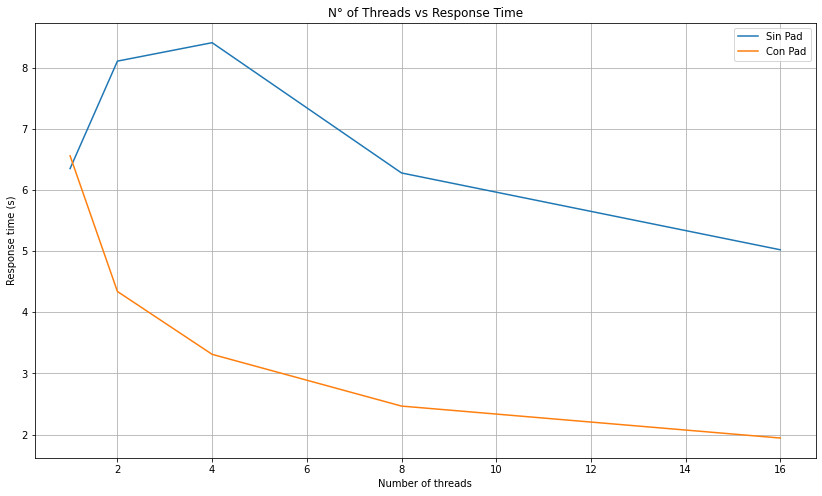

In [78]:
columns = dfEnd['Pad'].unique()
plt.rcParams["figure.figsize"] = (14, 8)

for i in (columns):
  grap = dfEnd[dfEnd["Pad"] == i]
  lab = "Con Pad" if i == True else "Sin Pad"
  plt.plot(grap['Threads'], grap['Time(s)'], label=lab)
  plt.title("N° of Threads vs Response Time")
  plt.xlabel("Number of threads")
  plt.ylabel("Response time (s)")

plt.grid()
plt.legend()
plt.savefig('responseTime.jpg')
plt.show()

##Graficos Speedup

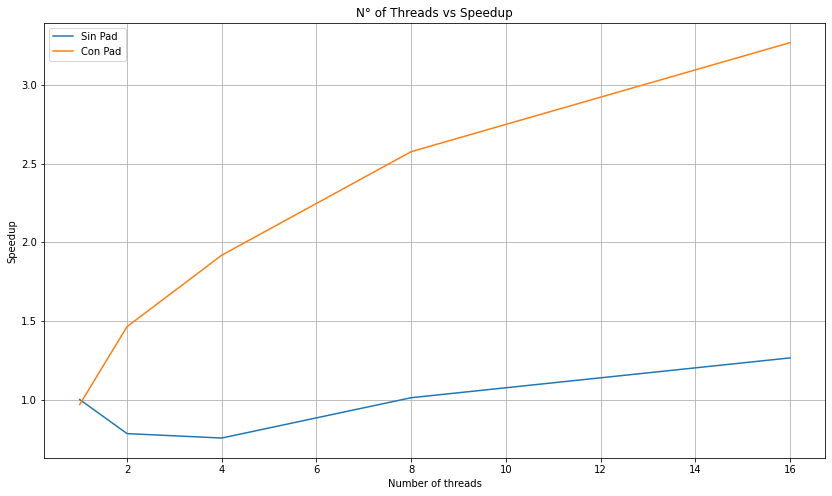

In [79]:
columns = dfEnd['Pad'].unique()
plt.rcParams["figure.figsize"] = (14, 8)
timeB = dfEnd['Time(s)'].iloc[0]

for i in (columns):
  grap = dfEnd[dfEnd["Pad"] == i]
  lab = "Con Pad" if i == True else "Sin Pad"
  spu = timeB / grap['Time(s)']
  plt.plot(grap['Threads'], spu, label=lab)
  plt.title("N° of Threads vs Speedup")
  plt.xlabel("Number of threads")
  plt.ylabel("Speedup")

plt.grid()
plt.legend()
plt.savefig('speedup.jpg')
plt.show()

##Crear el pdf con los gráficos

In [80]:
from PIL import Image

images = [
    Image.open("" + f)
    for f in ["responseTime.jpg", "speedup.jpg"]
]

pdf_path = "results.pdf"
    
images[0].save(
    pdf_path, "PDF" ,resolution=100.0, save_all=True, append_images=images[1:]
)